In [ ]:
!git clone https://github.com/kunan-sa/asistocovid.git

fatal: destination path 'asistocovid' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('/content/asistocovid/DatasetAsistocovid.csv')

#Listado de puntos a cubrir en análisis y curación:






1.   Asegurarse de tener ids/claves únicas
2.   Chequear que no haya datos duplicados
3.   No usar caracteres especiales en las etiquetas de variables.
4.   Verificar que no haya problemas de codificación/encoding.
5.   Verificar la consistencia de las variables.
6.   Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?.
7.   Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes.
8.   Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.








**Para realizar el análisis y curación realizamos el procedimiento haciendo una combinación de por el checklist del Banco Mundial (https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) y los procedimientos propios referentes a NLP.**

En primer lugar observamos que no tuvimos ningún mensaje de error en la importación de los datos. No obstante, vamos a explorar el dataframe para detectar errores a simple vista.

In [ ]:
df

,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
0,0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,25-3-2020,17:16:57
1,1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,25-3-2020,17:16:57
2,2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,25-3-2020,17:17:23
3,3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Los síntomas del coronavirus COVID-19 generalm...,25-3-2020,17:17:23
4,4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,25-3-2020,17:18:4
...,...,...,...,...,...,...,...,...
23374,23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,10-6-2020,20:18:59
23375,23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,10-6-2020,20:36:13
23376,23376,6d3ba6b127574379b87708ba6ce8a316,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,10-6-2020,20:36:14
23377,23377,85913d6328f94070a7cf57ba1c393d7e,user,get_started,1.000000,/get_started,10-6-2020,20:42:4


In [ ]:
# vemos una muestra aleatoria del dataframe 
import numpy as np
np.random.seed(0)
df.sample(5)

,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
1448,1448,84d8db60-e866-4e2e-a1c3-9bf06c26fc48,user,ask_aislamiento,0.403516,puedo salir de casa?,27-3-2020,15:5:43
12503,12503,abcff069d6db450c91cdc851ce1061cb,bot,NaN,NaN,La OMS sugiere que solo utilicen mascarilla o ...,17-4-2020,12:57:35
21318,21318,e551e8daac434e2b964f4db969153613,bot,NaN,NaN,En la fecha 25/05/2020 en la provincia de Córd...,26-5-2020,13:7:20
13377,13377,da4ff18f3bc74fe09e617a1c58c11eb2,user,ask_sintomas,0.762829,sintomas,20-4-2020,13:47:38
13925,13925,400525a9073e41198161926189ea2fa8,bot,NaN,NaN,Los coronavirus son una extensa familia de vir...,21-4-2020,21:11:23


In [ ]:
df.dtypes

ID_evento            int64
ID_conversacion     object
evento              object
categoria           object
confidence         float64
texto               object
fecha               object
hora                object
dtype: object

Al igual que lo observado en el TP1, la columna **fecha** no fue tomada como fecha. Corregimos eso.

In [ ]:
df= pd.read_csv('/content/asistocovid/DatasetAsistocovid.csv', parse_dates=['fecha'], infer_datetime_format=True)
df

,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
0,0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25,17:16:57
1,1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25,17:16:57
2,2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25,17:17:23
3,3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25,17:17:23
4,4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25,17:18:4
...,...,...,...,...,...,...,...,...
23374,23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10,20:18:59
23375,23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,2020-06-10,20:36:13
23376,23376,6d3ba6b127574379b87708ba6ce8a316,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10,20:36:14
23377,23377,85913d6328f94070a7cf57ba1c393d7e,user,get_started,1.000000,/get_started,2020-06-10,20:42:4


In [ ]:
#Calculamos el rango de fechas
df.fecha.max()-df.fecha.min()

Timedelta('77 days 00:00:00')

In [ ]:
#Observamos la fecha inicial y la fecha final
print (df.fecha.min())
print (df.fecha.max())

2020-03-25 00:00:00
2020-06-10 00:00:00


In [ ]:
#Ahora vemos un resumen de los datos.
df.describe(include='all')

,ID_evento,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
count,23379.000000,23379,23379,12534,12537.000000,23376,23379,23379
unique,NaN,3478,2,80,NaN,4884,78,10649
top,NaN,ef8e43c315034d4d8ce415765c6f9f48,user,get_started,NaN,/get_started,2020-04-05 00:00:00,14:14:27
freq,NaN,2333,12537,3078,NaN,3078,1347,12
first,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-10 00:00:00,NaN
mean,11689.000000,NaN,NaN,NaN,0.709095,NaN,NaN,NaN
std,6749.080308,NaN,NaN,NaN,0.349981,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,5844.500000,NaN,NaN,NaN,0.328216,NaN,NaN,NaN


Observaciones:

1.   La columna ID figura como tipo int64, lo cual no nos interesa como número ya que queremos si nos puede servir como ID, ver la cantidad de valores únicos, etc. Podemos indicarla como index.
2.   Debemos decicir si la columna hora nos interesa conservarla en una columna separada o añadirla a la columna fecha.



In [ ]:
df= pd.read_csv('/content/asistocovid/DatasetAsistocovid.csv', parse_dates=['fecha'], infer_datetime_format=True, index_col='ID_evento')
df.describe(include='all')

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
count,23379,23379,12534,12537.000000,23376,23379,23379
unique,3478,2,80,NaN,4884,78,10649
top,ef8e43c315034d4d8ce415765c6f9f48,user,get_started,NaN,/get_started,2020-04-05 00:00:00,14:14:27
freq,2333,12537,3078,NaN,3078,1347,12
first,NaN,NaN,NaN,NaN,NaN,2020-03-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-06-10 00:00:00,NaN
mean,NaN,NaN,NaN,0.709095,NaN,NaN,NaN
std,NaN,NaN,NaN,0.349981,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.328216,NaN,NaN,NaN


In [ ]:
np.random.seed(0)
df.sample(5)

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,
1448,84d8db60-e866-4e2e-a1c3-9bf06c26fc48,user,ask_aislamiento,0.403516,puedo salir de casa?,2020-03-27,15:5:43
12503,abcff069d6db450c91cdc851ce1061cb,bot,NaN,NaN,La OMS sugiere que solo utilicen mascarilla o ...,2020-04-17,12:57:35
21318,e551e8daac434e2b964f4db969153613,bot,NaN,NaN,En la fecha 25/05/2020 en la provincia de Córd...,2020-05-26,13:7:20
13377,da4ff18f3bc74fe09e617a1c58c11eb2,user,ask_sintomas,0.762829,sintomas,2020-04-20,13:47:38
13925,400525a9073e41198161926189ea2fa8,bot,NaN,NaN,Los coronavirus son una extensa familia de vir...,2020-04-21,21:11:23


# 1. Asegurar de tener ids/claves únicas

In [ ]:
df.shape

(23379, 7)

In [ ]:
# Veremos primero si existen valores de indices duplicados
df[df.index.duplicated()]

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,


No tenemos indices duplicados.

# 2. Chequear que no hata datos duplicados

In [ ]:
# Vemos si existen filas de datos duplicadas.
df[df.duplicated(keep=False)]

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,
23,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43
24,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43
28,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47
29,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47
57,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:28:45
...,...,...,...,...,...,...,...
22905,4b0edbbe6e4941058f4fc6ef76cdc36e,user,ask_restaurantes,1.0,"/ask_restaurantes{""pais"": ""Argentina""}",2020-06-05,19:54:49
22917,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54
22918,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54


Vemos que hay bastantes filas dupliacadas. A simple vista parecen ser registros 'colados' ya que pertenecen al usuario y vemos que en el texto figura en nombre de la categoría. Probablemente tengamos que borrar esas filas. Al ser demasiadas, vamos a armar un dataframe con los duplicados para explorarlos.

In [ ]:
duplicados = pd.DataFrame(df[df.duplicated(keep=False)])
duplicados

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,
23,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43
24,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43
28,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47
29,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47
57,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:28:45
...,...,...,...,...,...,...,...
22905,4b0edbbe6e4941058f4fc6ef76cdc36e,user,ask_restaurantes,1.0,"/ask_restaurantes{""pais"": ""Argentina""}",2020-06-05,19:54:49
22917,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54
22918,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54


In [ ]:
duplicados.describe(include='all')

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
count,2005,2005,2003,2003.000000,2005,2005,2005
unique,382,2,61,NaN,293,64,864
top,ef8e43c315034d4d8ce415765c6f9f48,user,ask_aislamiento,NaN,/ask_aislamiento{},2020-04-05 00:00:00,16:13:37
freq,254,2003,227,NaN,133,176,11
first,NaN,NaN,NaN,NaN,NaN,2020-03-25 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-06-10 00:00:00,NaN
mean,NaN,NaN,NaN,0.956597,NaN,NaN,NaN
std,NaN,NaN,NaN,0.161993,NaN,NaN,NaN
min,NaN,NaN,NaN,0.200425,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


Como nos interesa las conversaciones del bot con el/la usuario/a, vamos a agrupar el dataframe bajo el criterio si en la coluna **texto** el string comienza con '/' donde claramente no es consistente con el lenguaje coloquial.

Vemos, además, que la mayoría de filas (excepto dos) corresponden al user, veamos cuáles son las del bot.

In [ ]:
#duplicados.evento.value_counts()

In [ ]:
duplicados[duplicados.evento=='bot']

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,
10009,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Hola! ¿Cómo te puedo ayudar?,2020-04-13,12:32:7
10011,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Hola! ¿Cómo te puedo ayudar?,2020-04-13,12:32:7


Los elementos duplicados del bot son válidos ya que se trata de un mensaje estandarizado. Vemos que sucede en esa franja de conversación entre el bot y el usuario (vemos que según el ID del evento, no son filas consecutivas, por lo tanto debe estar la respuesta del user)

In [ ]:
df.loc[10008:10015]

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora
ID_evento,,,,,,,
10008,1af62362feee4639aec27febab6ea0ad,user,greet,0.561707,hola,2020-04-13,12:32:6
10009,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Hola! ¿Cómo te puedo ayudar?,2020-04-13,12:32:7
10010,1af62362feee4639aec27febab6ea0ad,user,greet,0.561707,hola,2020-04-13,12:32:7
10011,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Hola! ¿Cómo te puedo ayudar?,2020-04-13,12:32:7
10012,1af62362feee4639aec27febab6ea0ad,user,greet,0.561707,hola,2020-04-13,12:32:8
10013,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Hola! ¿Cómo te puedo ayudar?,2020-04-13,12:32:8
10014,1af62362feee4639aec27febab6ea0ad,user,ask_bot_challenge,0.145114,sos un bot?,2020-04-13,12:32:12
10015,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,"Perdón, no sé si entendí correctamente 🤔 Tu in...",2020-04-13,12:32:12


Parece que se trata de un user al que le gusta saludar varias veces...

Volvemos a examinar a los del grupo de texto '/ask'

In [ ]:
#Creamos la columna 'tipo' y asignamos el valor 'colado' a la fila cuyo texto comienza con '/' y valido en el otro caso
duplicados['tipo']= np.where(duplicados.texto.str.contains('^/'),'colado', 'valido')
duplicados

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
ID_evento,,,,,,,,
23,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43,colado
24,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:43,colado
28,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47,colado
29,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:25:47,colado
57,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_correo,1.0,/ask_correo{},2020-03-25,17:28:45,colado
...,...,...,...,...,...,...,...,...
22905,4b0edbbe6e4941058f4fc6ef76cdc36e,user,ask_restaurantes,1.0,"/ask_restaurantes{""pais"": ""Argentina""}",2020-06-05,19:54:49,colado
22917,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54,colado
22918,1bc8d41ef6184bd9b4f0492b9785bfc3,user,ask_sexo,1.0,/ask_sexo{},2020-06-05,20:4:54,colado


In [ ]:
duplicados.tipo.value_counts()

colado    1365
valido     640
Name: tipo, dtype: int64

In [ ]:
duplicados.describe(include='all')

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
count,2005,2005,2003,2003.000000,2005,2005,2005,2005
unique,382,2,61,NaN,293,64,864,2
top,ef8e43c315034d4d8ce415765c6f9f48,user,ask_aislamiento,NaN,/ask_aislamiento{},2020-04-05 00:00:00,16:13:37,colado
freq,254,2003,227,NaN,133,176,11,1365
first,NaN,NaN,NaN,NaN,NaN,2020-03-25 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-06-10 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,0.956597,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.161993,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.200425,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [ ]:
#miramos random
duplicados[duplicados.tipo=='colado'].sample(20)

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
ID_evento,,,,,,,,
2466,796562c9-1c34-4f5e-9b32-a0eb43dbca59,user,ask_aislamiento,1.0,/ask_aislamiento{},2020-03-29,17:11:21,colado
2558,118ec362-69c3-4aa4-a687-87898c710622,user,ask_sintomas,1.0,/ask_sintomas{},2020-03-29,21:21:36,colado
13261,d73adcab208a4b518ff13b5d43c59add,user,ask_ferreteria,1.0,/ask_ferreteria{},2020-04-19,23:6:42,colado
22687,8b4e1e5b319943bd8ec69ab3743996b9,user,ask_datos,1.0,/ask_datos{},2020-06-04,16:49:29,colado
11108,33aba38e1c5744b5a62391597d1ac4b1,user,ask_sintomas,1.0,/ask_sintomas{},2020-04-14,21:44:37,colado
16579,e53927d72e4c48908330f8ef85efb074,user,ask_aburrido,1.0,/ask_aburrido{},2020-04-29,20:43:31,colado
9654,7a90b81b54a54dd08ffc5fe5c603644c,user,ask_prevencion,1.0,/ask_prevencion{},2020-04-13,10:56:37,colado
8283,8bbbb3dbbcd94837bfcad6e8bf11702e,user,ask_rapipago,1.0,/ask_rapipago{},2020-04-08,23:56:45,colado
16066,96a06be2f42a4a8694ebc2916c33c775,user,ask_coronavirus,1.0,/ask_coronavirus{},2020-04-28,0:40:27,colado


In [ ]:
#Aparentemente todos los textos que comienzas con '/' son colados, pero veamos si alguno no se trata de un error de tipeo del user. Veamos quienes NO contienen '{}'
duplicados[(duplicados.tipo=='colado') &~(duplicados.texto.str.contains('{}'))]

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
ID_evento,,,,,,,,
19715,9e9fd6f4d531459581f003a2c5d11735,user,ask_datos,1.0,"/ask_datos{""pais"": ""China""}",2020-05-18,12:27:29,colado
19716,9e9fd6f4d531459581f003a2c5d11735,user,ask_datos,1.0,"/ask_datos{""pais"": ""China""}",2020-05-18,12:27:29,colado
19717,9e9fd6f4d531459581f003a2c5d11735,user,ask_datos,1.0,"/ask_datos{""pais"": ""China""}",2020-05-18,12:27:29,colado
19718,9e9fd6f4d531459581f003a2c5d11735,user,ask_datos,1.0,"/ask_datos{""pais"": ""China""}",2020-05-18,12:27:29,colado
20007,ef8e43c315034d4d8ce415765c6f9f48,user,ask_datos,1.0,"/ask_datos{""localidad"": ""misiones""}",2020-05-19,14:37:27,colado
20008,ef8e43c315034d4d8ce415765c6f9f48,user,ask_datos,1.0,"/ask_datos{""localidad"": ""misiones""}",2020-05-19,14:37:27,colado
21314,e551e8daac434e2b964f4db969153613,user,ask_datos,1.0,"/ask_datos{""localidad"": ""cordoba""}",2020-05-26,13:6:25,colado
21315,e551e8daac434e2b964f4db969153613,user,ask_datos,1.0,"/ask_datos{""localidad"": ""cordoba""}",2020-05-26,13:6:25,colado
21362,23090a297692449395c274b5da573c64,user,ask_datos,1.0,"/ask_datos{""localidad"": ""cordoba""}",2020-05-26,15:42:43,colado


Podemos considerar entonces, que todos los textos que comienzan con '/' y usan '{} son colados. (Seria mucha coincidencia que se debieran a errores de tipeo del user).

In [ ]:
#revisamos quienes no estan colados
duplicados[duplicados.tipo=='valido'].sample(20)

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
ID_evento,,,,,,,,
3873,22f09095-e772-475b-891b-3a6f2ccb3408,user,ask_aislamiento,1.000000,cuando termina la cuarentena,2020-04-01,15:20:49,valido
12040,25beb1a9e1d64e28b30418933f31b26f,user,ask_denuncia,0.258495,como denuncio,2020-04-16,10:49:49,valido
6154,ef8e43c315034d4d8ce415765c6f9f48,user,ask_datos,1.000000,Número de contagiados en Argentina,2020-04-06,0:2:36,valido
2603,50e43c3b-5274-445c-9901-d52eebc6e532,user,ask_datos,1.000000,cuantos infectados hubo en la ultima semana en...,2020-03-29,23:59:51,valido
5736,ef8e43c315034d4d8ce415765c6f9f48,user,ask_sintomas,1.000000,Fiebre 39 grados,2020-04-05,20:28:53,valido
5472,ef8e43c315034d4d8ce415765c6f9f48,user,ask_sintomas,1.000000,Cuando uno adquiere el virus Covid 19 cuál es ...,2020-04-05,18:33:16,valido
5602,ef8e43c315034d4d8ce415765c6f9f48,user,ask_sintomas,1.000000,¿Qué se puede hacer para prevenir el contagio ...,2020-04-05,19:35:37,valido
13135,6ce54bc13d6f477b81ebde33c0d4af07,user,greet,0.217664,noplo,2020-04-19,15:23:1,valido
6702,31075f9bce3d47d2a5f4b61911870cd4,user,ask_aislamiento,1.000000,puedo realizar juntadas en casa,2020-04-06,20:52:31,valido


En conclusión, los valores duplicados que no nos interesa conservar con los que figuran como 'colados' en la tabla 'Duplicados'.

Del análisis de los duplicados encontramos estos registros que llamamos colados, (quizas son emojis), pero no nos sirven a la hora del procesamiento del lenguaje natural. Deberiamos detectar aquellos colados que no estan duplicados dentro de la tabla.

In [ ]:
df['tipo']= np.where(df.texto.str.contains('^/', '{}'), 'colado', 'valido')
df.sample(10)

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo
ID_evento,,,,,,,,
2293,0ac1a2ce-5d3e-4cec-9701-3f0f0cd677df,user,greet,0.748863,Hola,2020-03-29,14:59:54,valido
7346,f201b4ef1b6f4a94b3627297f08cb32d,bot,NaN,NaN,La OMS sugiere que solo utilicen mascarilla o ...,2020-04-07,22:55:2,valido
12732,1af62362feee4639aec27febab6ea0ad,bot,NaN,NaN,Se reinició el chat.,2020-04-17,22:53:15,valido
22297,9db2baa288fe4352991592a198350f5e,bot,NaN,NaN,En Perú el 31/05/2020 se registraron 8805 nuev...,2020-06-01,22:40:18,valido
7138,1c83e54fbf944e09aafbdb29859f1b08,user,ask_banco,0.910735,cajero,2020-04-07,16:26:13,valido
12633,3d4c9ad95f3f4f41b1fcc2d9ce06bf10,user,get_started,1.000000,/get_started,2020-04-17,17:32:23,colado
3956,a215987b-7be5-4c8b-8117-002572a50fbd,user,ask_aislamiento,0.575183,cuando puedo salir de mi casa,2020-04-01,16:10:43,valido
16953,275d323f4f694c39bda34209e3eda1a0,bot,NaN,NaN,Soy el asistente virtual para consultas del co...,2020-05-01,17:48:21,valido
3497,8140b01b-c7a9-4eb2-9105-7dff9889370a,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,2020-03-31,20:11:12,valido


# 3.   No usar caracteres especiales en las etiquetas de variables.


In [ ]:
#chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

Nada raro en las etiquetas de columnas

# 4.   Verificar que no haya problemas de codificación/encoding.


In [ ]:
import chardet

In [ ]:
with open("/content/asistocovid/DatasetAsistocovid.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'confidence': 0.5736163935929491,
 'encoding': 'Windows-1254',
 'language': 'Turkish'}

La libreria detecto comom lenguaje 'Turco' con un encofing Windows (Deberiamos indicarle eso al pandas??). Vamos a ver si hay caracteres raros.

In [ ]:
!pip install ftfy

In [ ]:
import ftfy.badness as bad
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


df['texto_raro'] = df['texto'].apply(weird)
df[df['texto_raro'] >= 1]

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo,texto_raro
ID_evento,,,,,,,,,


Parece que no hay ningún caracter raro en el corpus a priori...

# 5.   Verificar la consistencia de las variables.


In [ ]:
df.head(6)

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo,texto_raro
ID_evento,,,,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25,17:16:57,valido,0
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25,17:16:57,valido,0
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25,17:17:23,valido,0
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25,17:17:23,valido,0
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25,17:18:4,valido,0
5,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,La obligatoriedad del aislamiento implica que ...,2020-03-25,17:18:4,valido,0


Partimos de la base para el análisis de consistencia en no incluir a las filas cuyo texto comienzan con un "/" y que fueron categorizados bajo el tipo 'colado'. Lo más probable es que eliminemos esos registros ya que no nos van a servir a tales fines.

Vamos a examinar un poco en que consiste ID_conversacion.

In [ ]:
#completar/terminar.
df[~(df.tipo=='colado')].ID_conversacion.value_counts()


ef8e43c315034d4d8ce415765c6f9f48    2213
8bbbb3dbbcd94837bfcad6e8bf11702e    1264
1af62362feee4639aec27febab6ea0ad     524
1c83e54fbf944e09aafbdb29859f1b08     445
fbf058f258f44d208eb86c3ecf97bfa1     166
                                    ... 
37cb12037f79437886059d036c4c436a       1
39264d1796e34efb8089571f17c23612       1
2bd94dca1ecc44d7a66a613766cdc5ec       1
2fc51931b84945328b74273bfccd6a46       1
e8e74eeb11a948c499582ef0d39bb7c0       1
Name: ID_conversacion, Length: 3471, dtype: int64

Parece que pocos ID tuvieron mucho intercambio de conversaciones con el bot, y muchos IDs poco intercambio. 

Así mismo vemos que hay Ids que no tienen ninguna conversación (puede deberse a que esta asociado a un valor 'colado' o a un valor nulo).

In [ ]:

df[df.ID_conversacion=='1d84a7c4028f45e592c39d1ca79df2e8']

,ID_conversacion,evento,categoria,confidence,texto,fecha,hora,tipo,texto_raro
ID_evento,,,,,,,,,
21533,1d84a7c4028f45e592c39d1ca79df2e8,user,get_started,1.0,/get_started,2020-05-27,16:31:57,colado,0


# 6.   Identificar y documentar valores atípicos/outliers. Qué outliers pueden haberse encontrado en el análisis del práctico previo?.


En el práctico anterior habíamos observado que se cumplía con la ley de Zipf donde pocas palabras se repiten muchas veces y muchas palabras se repiten pocas veces.

En este caso los outliers o valores atípicos seran las palabras que tienen una frecuencia igual a 1, lo que significa que se usa una sola vez en todo el corpus.

In [ ]:
#Ver si codeamos algo aca

# 7.   Tratar valores faltantes: quitar o imputar. En éste caso, se correspondería tambien con buscar si hay conversaciones vacías, y quitarlas ya que no aportarían nada a los prácticos siguientes.


In [ ]:
df.texto.isna().value_counts()

False    23376
True         3
Name: texto, dtype: int64

In [ ]:
#armamos un dataset SIN los colados para ir trabajando mas comodos y preparando el dataset.
data = df[(df.tipo=='valido')]
data = data[['ID_conversacion', 'evento', 'categoria', 'confidence', 'texto', 'fecha']]
data

,ID_conversacion,evento,categoria,confidence,texto,fecha
ID_evento,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,NaN,NaN,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25
...,...,...,...,...,...,...
23373,21c953e3096d4d2a8efcf9f0ea93ba17,user,ask_datos,0.710912,De dónde son esos casos?,2020-06-10
23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,NaN,NaN,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10
23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,2020-06-10


In [ ]:
data.isna().any()

ID_conversacion    False
evento             False
categoria           True
confidence          True
texto              False
fecha              False
dtype: bool

In [ ]:
pd.crosstab(data.evento, data.categoria.isnull())

categoria,False,True
evento,,
bot,0,10842
user,7769,0


Vemos que los datos nulos se corresponden con la categoria y el confidence de las respues del bot (las cuales no nos interesan para nuestro análisis). Existían conversaciones vacías que se correspondían con los '/ask_', /get', etc.

In [ ]:
#Reemplazamos los valores nulos por un string para luego poder codificar la variable
data.categoria=data.categoria.fillna('respuesta')
data.confidence=data.confidence.fillna(1)

data

,ID_conversacion,evento,categoria,confidence,texto,fecha
ID_evento,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,respuesta,1.000000,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,respuesta,1.000000,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25
...,...,...,...,...,...,...
23373,21c953e3096d4d2a8efcf9f0ea93ba17,user,ask_datos,0.710912,De dónde son esos casos?,2020-06-10
23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,respuesta,1.000000,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10
23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,2020-06-10


# 8.   Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas. Aquí ya se puede empezar a pensar en vectorizar las frases para los prácticos posteriores.

 Explore CountVectorizer y TdidfVectorizer de sklearn. Así mismo, considere si corresponde algún preprocesamiento de las frases antes de la vectorización.



OPCIONAL:
 hay que vectorizar las frases de usuario, también se puede probar con word embeddings preentrenados. Como en éste caso se trata de oraciones, habría que usar los embeddings de palabras para los tokens y combinarlos para tener una representación por cada frase. Se puede pensar en la suma de los vectores o el promedio por ejemplo.


In [ ]:
data

,ID_conversacion,evento,categoria,confidence,texto,fecha
ID_evento,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_mascota,0.536555,puedo ir a pasear mi perro,2020-03-25
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,respuesta,1.000000,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_sintomas,0.378679,como sé si tengo el coronavirus,2020-03-25
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,respuesta,1.000000,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,ask_aislamiento,0.478023,Puedo ir a visitar otra gente?,2020-03-25
...,...,...,...,...,...,...
23373,21c953e3096d4d2a8efcf9f0ea93ba17,user,ask_datos,0.710912,De dónde son esos casos?,2020-06-10
23374,21c953e3096d4d2a8efcf9f0ea93ba17,bot,respuesta,1.000000,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10
23375,6d3ba6b127574379b87708ba6ce8a316,user,ask_datos,0.456839,Infecrados hoy cordoba,2020-06-10


In [ ]:
# las binarizamos o numerizamos??
#En este caso vamos  a etiquetasr con números las variables 'evento' y 'categoria'
column='categoria'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(data[column])
data[column] = le.transform(data[column]) 
data.head()

,ID_conversacion,evento,categoria,confidence,texto,fecha
ID_evento,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,40,0.536555,puedo ir a pasear mi perro,2020-03-25
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,72,1.000000,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,53,0.378679,como sé si tengo el coronavirus,2020-03-25
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,bot,72,1.000000,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,user,3,0.478023,Puedo ir a visitar otra gente?,2020-03-25


In [ ]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'HOLA': 0,
 'affirm': 1,
 'ask_aburrido': 2,
 'ask_aislamiento': 3,
 'ask_alimento': 4,
 'ask_alquiler': 5,
 'ask_asintomatico': 6,
 'ask_autosecuestro': 7,
 'ask_banco': 8,
 'ask_barbijo': 9,
 'ask_bot_challenge': 10,
 'ask_bot_name': 11,
 'ask_coronavirus': 12,
 'ask_correo': 13,
 'ask_credito': 14,
 'ask_datos': 15,
 'ask_dentista': 16,
 'ask_denuncia': 17,
 'ask_discapacidad': 18,
 'ask_embarazada': 19,
 'ask_empresa': 20,
 'ask_enojo': 21,
 'ask_escuelas': 22,
 'ask_evento': 23,
 'ask_exceptuados': 24,
 'ask_familiares': 25,
 'ask_farmacia': 26,
 'ask_ferreteria': 27,
 'ask_fincuarentena': 28,
 'ask_hospital': 29,
 'ask_howdoing': 30,
 'ask_howold': 31,
 'ask_ife': 32,
 'ask_incubacion': 33,
 'ask_joke_request': 34,
 'ask_languagesbot': 35,
 'ask_limpiar': 36,
 'ask_limpiar_compras': 37,
 'ask_limpiar_hogar': 38,
 'ask_made': 39,
 'ask_mascota': 40,
 'ask_mercado': 41,
 'ask_mercados': 42,
 'ask_mujeres_violencia': 43,
 'ask_pagar_servicios': 44,
 'ask_permisocircular': 45,
 'ask

In [ ]:
#Hacemos lo mismo para la variable evento, utilizando np.where. Usamos 0 para la respuesta del bot, 1 para la respuesta del user
data.evento= np.where(data.evento=='bot',0,1)
data

,ID_conversacion,evento,categoria,confidence,texto,fecha
ID_evento,,,,,,
0,dd9419e4-e2ce-41ff-a873-45ee155b7332,1,40,0.536555,puedo ir a pasear mi perro,2020-03-25
1,dd9419e4-e2ce-41ff-a873-45ee155b7332,0,72,1.000000,Se puede sacar a pasear a las mascotas minimiz...,2020-03-25
2,dd9419e4-e2ce-41ff-a873-45ee155b7332,1,53,0.378679,como sé si tengo el coronavirus,2020-03-25
3,dd9419e4-e2ce-41ff-a873-45ee155b7332,0,72,1.000000,Los síntomas del coronavirus COVID-19 generalm...,2020-03-25
4,dd9419e4-e2ce-41ff-a873-45ee155b7332,1,3,0.478023,Puedo ir a visitar otra gente?,2020-03-25
...,...,...,...,...,...,...
23373,21c953e3096d4d2a8efcf9f0ea93ba17,1,15,0.710912,De dónde son esos casos?,2020-06-10
23374,21c953e3096d4d2a8efcf9f0ea93ba17,0,72,1.000000,En la fecha 9/06/2020 en la provincia de Córdo...,2020-06-10
23375,6d3ba6b127574379b87708ba6ce8a316,1,15,0.456839,Infecrados hoy cordoba,2020-06-10


#Vectorización 

##Opcion 1: Utilizar frecuencias y frecuencias relativas (tfidf)
 Para trabajar con este tipo de modelos necesitamos una matríz de frecuencias que pueden ser CountVectorizer o Tfidf. Se le aplica LSA o SVM para reducir su dimensionalidad.

##Pasos:

1.   **Preprocesamiento** Definimos qué es lo que queremos captar del documento. Removemos Stopwords, mayúsculas, signos de puntuación, typos, y lematizamos las palabras.


*  Tokenizar
*  Remover puntuaciones
*  Stopwords
*  Mayúsculas
*  Lematización
*  Typos


2.   **Vectoización** Tf-idfvectorizer


##Opción 2: Vectorizar con embeddings

Tranformamos los documentos (frases) a vectores numéricos dentro de un espacio vectorial n-dimensional y se buscar los vectores "mas cercanos".






##**Conceptos**


**Tfidf**:Tf-idf (del inglés Term frequency – Inverse document frequency), frecuencia de término – frecuencia inversa de documento (o sea, la frecuencia de ocurrencia del término en la colección de documentos), es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. Esta medida se utiliza a menudo como un factor de ponderación en la recuperación de información y la minería de texto. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras. (Wikipedia:https://es.wikipedia.org/wiki/Tf-idf)

**NMF**- Factorización de matrices no negativas. Se busca reducir las dimensiones en los datos y que surjan ciertas características que permanecen ocultas a priori.

**LDA**- Latent Dirichlet Allocation. Método probabilístico para el modelado de temas.
En aprendizaje automático, la Asignación Latente de Dirichlet (ALD) o Latent Dirichlet Allocation (LDA) es un modelo generativo que permite que conjuntos de observaciones puedan ser explicados por grupos no observados que explican porqué algunas partes de los datos son similares. Por ejemplo, si las observaciones son palabras en documentos, presupone que cada documento es una mezcla de un pequeño número de categorías (también denominados como tópicos) y la aparición de cada palabra en un documento se debe a una de las categorías a las que el documento pertenece. LDA es un ejemplo de modelo de categorías y fue presentado como un modelo en grafo para descubrir categorías por David Blei, Andrew Ng y Michael Jordan en 2002.1​ (https://es.wikipedia.org/wiki/Latent_Dirichlet_Allocation)



**Latent Semantic Analysis:** es un modelo basado en una bolsa de palabras (cuyo oden no importa) y supone que las palabras con significados similares 
}deben ubicarse a una distancia cerca entre sí.




# Preprocesamiento

In [ ]:
#Extraemos las frases del user
frases= data[data.evento==1].texto.values
frases

array(['puedo ir a pasear mi perro', 'como sé si tengo el coronavirus',
       'Puedo ir a visitar otra gente?', ...,
       'Cuántos casos hay en Córdoba?', 'De dónde son esos casos?',
       'Infecrados hoy cordoba'], dtype=object)

**Lematizamos palabras y extraemos las stopwords**



In [ ]:
#Descargamos el vocabulario de Spacy en español para lematizar.
!python -m spacy download es_core_news_sm


     |████████████████████████████████| 16.2MB 948kB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172936 sha256=f8387a0f9515788f1aa31711b69e9008ae3edec31a062fbacc0e1780643e3274
  Stored in directory: /tmp/pip-ephem-wheel-cache-uuip3x9s/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
#importamos el módulo y el vocabulario en español.
nlp = spacy.load('es_core_news_sm')


In [ ]:
#Armamos una funcion que nos devuelva las palabras lematizadas y una lista con stopwords
def spacy_preprocessing (doc):#Lematizamos y sacamos las stopwords
  lematized=[]
  stops=[]
  for sent in doc:
    tokens = nlp(sent)
    lem= [tok.lemma_ for tok in tokens]
    lematized.append(lem)
    stp=[tok for tok in tokens if tok.is_stop==True]
    stops.append(stp)
  lemas=[' '.join(lemm).lower() for lemm in lematized]
  stops = [str(item).lower().replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u') for sublist in stops for item in sublist]
  stops= sorted(list(set(stops)), key=str.lower)
  
  return lemas, stops

lematizadas,stops = spacy_preprocessing(frases)

Tengamos en cuenta que las lematizaciones pueden tener sus desventajas al mailnterpretar algunas palabras: ej. 'PagoFacil' (nombre propio) en 'pagar facil'.

Para las stopwords también puede descargarse la lista predeterminada de nlptk en español o seleccionarlas viendo las frecuencias de cada palabra en el corpus con la librería collections.Counter.

Vamos a elegir por las stopwords que se indican en spacy.

In [ ]:
#Palabras mas frecuentes usando el collection.Counter
from collections import Counter
words_corpus = (' '.join(lematizadas)).split()
frecs = Counter(words_corpus)
frecs.most_common()[:30]


[('?', 2288),
 ('lo', 1086),
 ('en', 1051),
 ('que', 968),
 ('de', 957),
 ('poder', 879),
 ('a', 819),
 ('el', 809),
 ('haber', 756),
 ('ser', 633),
 ('caso', 604),
 ('ir', 499),
 ('tener', 473),
 ('cuanto', 470),
 ('hola', 444),
 ('se', 397),
 ('salir', 393),
 ('mi', 392),
 ('parir', 374),
 ('hacer', 364),
 ('uno', 359),
 ('comer', 352),
 ('me', 345),
 ('si', 344),
 ('puedo', 344),
 ('al', 304),
 ('los', 293),
 ('cuarentena', 289),
 ('cuando', 287),
 ('coronavirus', 254)]

In [ ]:
#Stopwords con npltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopws= stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Retiramos puntuación, tokenizamos y armamos la matríz tf-idf**

In [ ]:
#La libreria Vecrorizertfidf va a retirar las tildes, remover mayúsculas, y eliminar palabras q aparezcan en mas de 90% de los documentos y elimiar las stopwords.

vectorizertfidf = TfidfVectorizer(strip_accents='unicode', max_df=0.90, stop_words=stops)
tf1= vectorizertfidf.fit_transform(lematizadas)
fnames=vectorizertfidf.get_feature_names()
analyzer = vectorizertfidf.build_analyzer()



Vemos un ejemplo

In [ ]:
r = np.random.randint(1, len(frases))
print ('frase sin preprocesamiento : {}'.format(frases[r]))
print ('frase lematizada: {}'.format(lematizadas[r]))
print ('frase tokenizada: {}'.format(analyzer(frases[r])))

frase sin preprocesamiento : mariano max
frase lematizada: mariano max
frase tokenizada: ['mariano', 'max']


# Vectorización
Utilizamos la tfidf y countvectorizer

**Tf-idf**

La matríz tfidf ya se encuentra en la variable tf1

In [ ]:
tf1.shape

(7769, 2021)

**CountVectorizer**

In [ ]:
#Usando counter
vectorizer = CountVectorizer(strip_accents='unicode', stop_words= stops)
X = vectorizer.fit_transform(lematizadas)
X.shape

(7769, 2021)

**Reproducimos el dataframe resultante luego de la vectorizacion abajo en las consignas 'DataFrame1' y 'Dataframe2'**

**LSA**

El vocabulario define el espacio vectorial. La cantidad de palabras determinan la dimensión del espacio.

 Cada palabra esta representada por un punto en el espacio vectorial.

Se define una matriz de frecuencias.

Se asigna un score a documento

Se arma un espacio vectorial con los docs (las columnas son los docs y las filas las palabras).

Se le aplica Singular value decomposition (SVD)


In [ ]:
#LSA y SVD se aplican a la matriz tfidf para reducir las dimensiones

# DATASET1
Preparar un dataset para usar modelos supervisados. Éste debe incluir las frases de usuario, que son las que se van a usar para clasificar, más los labels.

In [ ]:
labels= data[data.evento==1].categoria.values
#con la tfidf. Hacemos un dataFrame de pandas.
tfsupervisado= pd.DataFrame(tf1.toarray(), columns=[fnames])
tfsupervisado['label']= labels
tfsupervisado

,01,02,03,0800,10,10000,1221,13,134,18,19,20,201dlos,21,24,25,26,29,3200,39,3andam,40,444,50,500,59,64,6565,6es,6no,80,93,abastar,abierto,abiertos,abiurrido,abonar,about,abren,abril,...,vivienda,vivir,vivo,voluminoso,voluntario,volver,volvera,volveran,vomitar,vomito,vosotros,vuelo,vuelos,vuelven,vuelvo,vulnerable,walk,walmart,web,what,whats,when,wherefrom,whisky,will,wsp,wuhan,xasos,ycomo,ye,york,you,zambia,zapatilla,zimbabue,zintomas,zona,zonas,zorro,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
7765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
7766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
7767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15


In [ ]:
#con la matriz del count. Hacemos un DataFrame de Pandas
xsupervisado= pd.DataFrame(X.toarray(), columns=[vectorizer.get_feature_names()])
xsupervisado['label']= labels
xsupervisado

,01,02,03,0800,10,10000,1221,13,134,18,19,20,201dlos,21,24,25,26,29,3200,39,3andam,40,444,50,500,59,64,6565,6es,6no,80,93,abastar,abierto,abiertos,abiurrido,abonar,about,abren,abril,...,vivienda,vivir,vivo,voluminoso,voluntario,volver,volvera,volveran,vomitar,vomito,vosotros,vuelo,vuelos,vuelven,vuelvo,vulnerable,walk,walmart,web,what,whats,when,wherefrom,whisky,will,wsp,wuhan,xasos,ycomo,ye,york,you,zambia,zapatilla,zimbabue,zintomas,zona,zonas,zorro,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
7765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
7766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
7767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


#DATASET2
Preparar el dataset para el práctico de aprendizaje no supervisado. Éste está orientado a descubrir tópicos en las preguntas no respondidas por el asistente, por lo que en éste caso debe filtrar éste subconjunto de frases.



In [ ]:
#Recolectamos las frases no respondidas.

no_resp= df.loc[df[(df.evento=='bot')&(df.texto.str.contains('^Disculpame'))].index-1].texto
no_resp= no_resp.drop(no_resp[no_resp.str.contains('^/')].index)
no_resp= list(no_resp)

In [ ]:
#lematizamos y buscamos stops
lema2, stop2 = spacy_preprocessing(no_resp)

In [ ]:
#Falta lematizar, pero lo dejamos pasar ya que son pocos docs
vectorizertfidf2 = TfidfVectorizer(strip_accents='unicode',stop_words=stop2 )#con el parametro strip_accent le sacamos las tildes.
tf2= vectorizertfidf2.fit_transform(lema2)
tf2.shape

(56, 48)

In [ ]:
#Armamos el DF
nosupervisado = pd.DataFrame(tf2.toarray(), columns=[vectorizertfidf2.get_feature_names()])
nosupervisado.head()

,abrir,abusador,ajjaja,cajero,casar,caso,casos,cerrar,circular,comer,comprar,confirmar,conseguir,contagiar,cuanto,dentista,encerrar,estar,fumador,funcionar,gracia,haber,hola,hora,importar,limpiar,llueve,lo,mariano,max,mercar,muerto,muertos,ok,parir,permiso,personal,personar,poder,quien,riesgo,ser,super,supermercado,telefonos,tener,transportar,uno
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.742553,0.0,0.0,0.0,0.0,0.669787,0.0,0.0,0.0,0.0
1,0.47318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.60263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.434785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.473180,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.786518,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.617567,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
r = np.random.randint(1, len(no_resp))
print ('frase sin preprocesamiento : {}'.format(no_resp[r]))
print ('frase tokenizada: {}'.format(analyzer(no_resp[r])))

frase sin preprocesamiento : los super estan abiertos
frase tokenizada: ['super', 'abiertos']


OPCIONAL: hay que vectorizar las frases de usuario, también se puede probar con word embeddings preentrenados. Como en éste caso se trata de oraciones, habría que usar los embeddings de palabras para los tokens y combinarlos para tener una representación por cada frase. Se puede pensar en la suma de los vectores o el promedio por ejemplo.



In [ ]:
type(lematizadas)

list

In [ ]:
def embedings(doc):



  documentos = [analyzer(d) for d in doc] #preprocesamos
  join=[' '.join(documentos[i]) for i in range(len(doc))]#volvemos a unir
  vec=[]
  
  for sent in join:
    tokens = nlp(sent)
    v= tokens.vector#Si le pedimos el vector a una sentencia nos devuelve el promedio de los vectores de cada token
    vec.append(v)

  return vec

In [ ]:
vectores = embedings(lematizadas)
len(vectores)

7769

In [ ]:
#armamos es dataframe
supervisado_emb=pd.DataFrame(vectores)
supervisado_emb['labels']= labels
supervisado_emb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,labels
0,5.176698,5.916139,-1.296114,1.299335,1.727240,-1.403485,-6.243727,-1.966477,3.012437,-0.646518,3.993645,-0.506293,-0.214167,5.014313,-2.642610,2.729628,-4.981976,1.562497,-0.351571,3.166581,3.135156,-2.574737,3.609683,0.044364,-3.689570,-2.165584,-4.264172,0.777204,3.482729,-4.950506,-4.069704,-3.159890,1.277593,-3.687551,3.655911,-5.916629,4.986844,0.813986,1.592723,2.947026,...,3.920075,-0.844187,-2.749852,-1.190442,1.490645,-2.549903,-2.802812,3.902373,1.181788,0.879328,0.357002,-1.542486,1.641207,7.398918,-2.106256,2.513569,-1.117992,-0.569436,-1.123300,2.210613,1.865427,-3.431884,-1.052957,-0.908724,-2.007987,1.210943,2.624394,2.566804,-0.727761,-2.284938,-3.372679,-5.647281,0.148049,1.111774,1.951065,0.169184,-1.244565,2.045327,4.487439,40
1,4.276896,4.471367,-2.900285,-1.310877,2.185825,0.640034,-5.157578,-1.507712,1.878749,-1.382643,3.513962,-0.842396,-2.645888,4.117965,-2.622995,3.744051,-2.459680,1.965094,0.508409,1.086478,3.477731,-3.282809,4.843421,-1.896866,-4.359363,0.055304,-3.297476,-0.896790,6.935510,-0.387544,1.937232,-2.644378,2.091005,-3.251631,3.803230,-4.391906,1.390050,-1.365420,-1.818302,-0.663049,...,4.722623,-2.694761,0.285055,0.151947,-1.007380,1.701935,-0.289842,2.498116,-1.857735,3.782124,-2.115825,2.192807,-0.264373,5.839504,-3.933368,3.234346,2.012419,-2.640965,1.030668,0.242727,2.003525,-2.113698,0.216326,0.721865,-0.915060,-2.056306,-0.527017,0.058154,1.483909,-3.805154,-3.212561,-4.138908,0.409122,-0.210386,1.888839,0.682991,-1.882456,-1.728907,2.464751,53
2,4.203075,2.491704,-1.876193,-0.879830,2.752900,-0.376511,-4.602614,2.156858,3.014837,1.612741,-0.348938,0.256952,-3.929307,1.685238,-1.041817,4.138247,-3.406768,0.549442,1.079377,0.327130,-0.470039,-1.154188,2.679084,0.875197,-3.213685,-2.342691,-3.300014,0.564633,5.539130,-3.146623,-2.548540,-3.676765,-1.343465,-4.956914,4.818744,-4.197067,2.621250,1.016130,1.068028,-0.148654,...,0.600686,0.190591,1.611598,0.681836,4.629572,0.667915,1.618321,0.750783,2.351388,2.825889,-2.941355,-0.241267,-0.708059,4.847055,-1.823396,0.449864,0.096045,1.686889,1.748087,0.656978,-1.897570,-0.973124,1.756486,1.150800,-0.195948,0.190244,-0.931317,-0.618669,0.217259,1.443154,-2.616372,-2.252380,1.298580,-0.848205,1.356480,-1.760203,-0.144309,0.436214,4.665328,3
3,7.462676,6.085371,-1.598451,-2.900874,2.470228,-3.249638,-8.309443,-3.340169,1.098055,0.113843,-0.787368,-2.352556,-5.534779,4.535689,0.951269,-4.032290,-3.615930,4.867376,-0.481379,5.643669,1.106360,-7.499969,-2.297707,-0.096637,2.312487,-0.292532,-3.290186,1.015993,-3.312640,-3.543411,-0.005400,-5.415795,4.831954,-3.869662,4.463762,-5.213189,1.482989,-1.533975,-2.026438,4.126819,...,9.749713,-0.272976,3.720948,-1.562285,3.219085,-1.655385,-0.624591,1.100230,5.701549,1.258871,-3.908728,2.186585,-1.792673,2.443954,0.250960,-2.565740,3.838683,1.646503,0.221514,-3.458318,5.553926,-2.228121,0.913226,-2.627597,-0.582797,0.945834,-1.824547,-1.412852,-2.519169,3.378025,-4.220870,-8.078979,-0.456096,1.128687,2.289625,-0.030895,2.554952,1.346106,1.207561,42
4,4.241384,5.884471,-1.434497,1.821301,3.455292,-0.641616,-4.579989,-2.333541,1.412300,-0.252793,-0.532705,-0.284142,-4.361076,3.922321,-1.423843,0.608829,-4.795017,1.843388,1.035968,1.897886,2.254487,-3.196649,-1.655218,0.096674,-1.988399,1.434320,-3.409516,2.443440,0.706672,-4.795011,-1.958572,-4.229024,-0.345981,-3.014377,3.696657,-6.364811,-0.925976,0.271016,-0.803016,0.472811,...,6.622897,-0.951035,1.298820,-1.685802,2.267475,0.045595,0.560484,0.100075,2.572175,4.849829,-1.222513,1.192729,-1.731901,2.443368,-1.754457,0.853116,3.748415,1.499807,1.436321,-0.340059,2.950290,-4.383919,0.296563,-0.950362,-1.159855,-0.049778,-2.540975,-0.396625,0.203459,-1.365134,-3.899064,-2.197216,0.409960,-1.878033,4.344242,0.470674,0

# Graficamos las palabras en un scatter

In [ ]:
#embedings usando word2vec
#


In [96]:
#traemos la data con evento uno de usuarios y lo ponemos un df 
#ver de sacar mas stops y acentos
frases3= data[data.evento==1]
frases3
lematizadas[0]
dfLema = pd.DataFrame(lematizadas, columns =['Frases'])
dfLema

,Frases
0,poder ir a pasear mi perro
1,comer ser si tener el coronavirus
2,puedo ir a visitar otro gente ?
3,poder ir al supermercado ?
4,estar abrir lo supermercado ?
...,...
7764,cuantos caso haber en argentino
7765,infectados
7766,cuántos caso haber en córdoba ?
7767,de dónde ser ese caso ?


In [ ]:
#funcion para crear corpus de palabras
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus2 = []
    for col in ['Frases']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus2.append(word_list)
            
    return corpus2

corpus3 = build_corpus(dfLema)        
corpus3[0:2]

[['poder', 'ir', 'a', 'pasear', 'mi', 'perro'],
 ['comer', 'ser', 'si', 'tener', 'el', 'coronavirus']]

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus3, size=70, window=20, min_count=200, workers=4)
model.layer1_size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  This is separate from the ipykernel package so we can avoid doing imports until


70

In [97]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [101]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


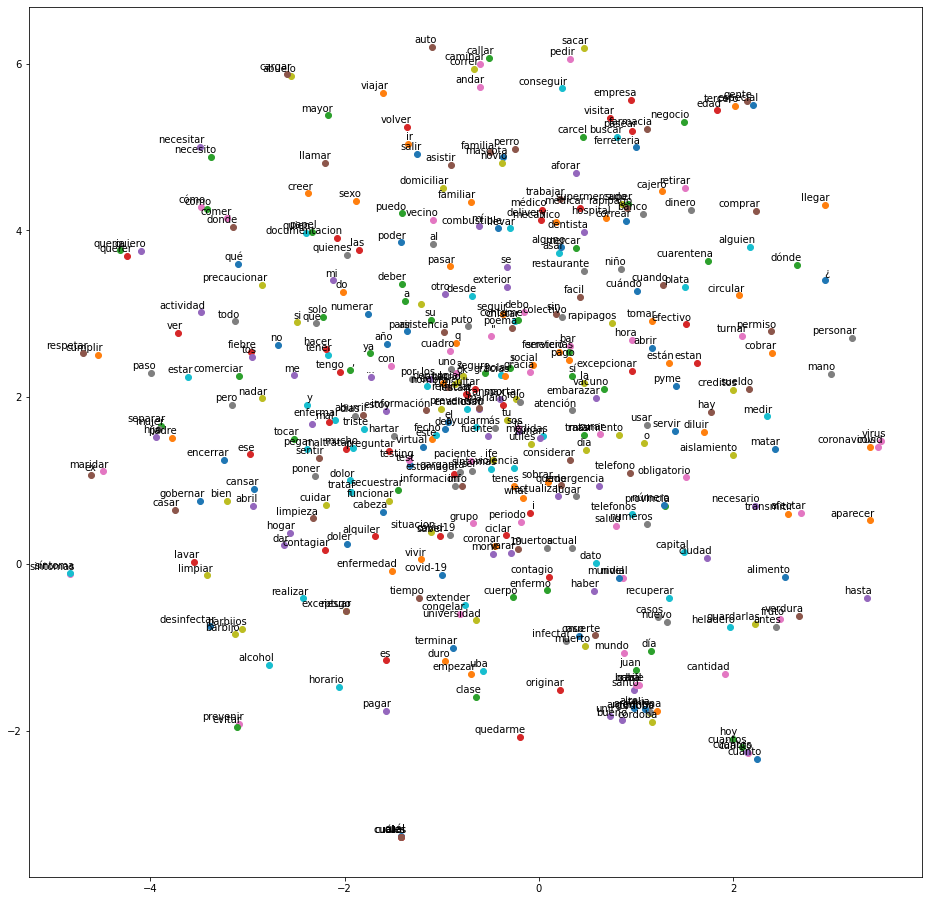

In [106]:
model = word2vec.Word2Vec(corpus3, size=200, window=5, min_count=10, workers=4, iter=300)
tsne_plot(model)

In [105]:
w1 = ["virus"]
model.wv.most_similar(positive=w1, topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cuerpo', 0.8026501536369324),
 ('covid', 0.7854305505752563),
 ('transmitir', 0.7681961059570312),
 ('coronar', 0.7599292993545532),
 ('afectar', 0.7407490611076355),
 ('aislamiento', 0.7338747978210449)]

In [108]:
w1 = ["cordoba"]
model.wv.most_similar(positive=w1, topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('córdoba', 0.6036194562911987),
 ('brasil', 0.5730303525924683),
 ('caba', 0.5470548868179321),
 ('chile', 0.5424438714981079),
 ('italia', 0.527434766292572),
 ('santo', 0.47502756118774414)]

In [ ]:
import random

def spacy_plot_words(doc):

  #preprocesamos los documentos
  documentos = [analyzer(d) for d in doc] #preprocesamos
  join=[' '.join(documentos[i]) for i in range(len(doc))]#volvemos a unir

  #armamos una bolsa de palabras
  bag=[]
  nlp_sent=[]

  for i  in range(len(join)):
    for word in join[i].split():
      if word not in bag:
        bag.append(word)

  rnd_bag =random.sample(bag,round(len(bag)/7))


  #armamos los vectores numericos y de palabras de esa bolsa, con embeddings preentrenados de spacy.
  nlp_words=[]
  nlp_vectors=[]
  for word in rnd_bag:
    nlp_word= nlp(word)
    nlp_vector = nlp_word.vector
    nlp_words.append(nlp_word)
    nlp_vectors.append(nlp_vector)


  #realizamos el scatter
  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(nlp_vectors)

  x = []
  y = []
  for value in new_values:
      x.append(value[0])
      y.append(value[1])
      
  

  plt.figure(figsize=(16, 16)) 
  for i in range(round(len(x))):
      plt.scatter(x[i],y[i])
      plt.annotate(nlp_words[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')



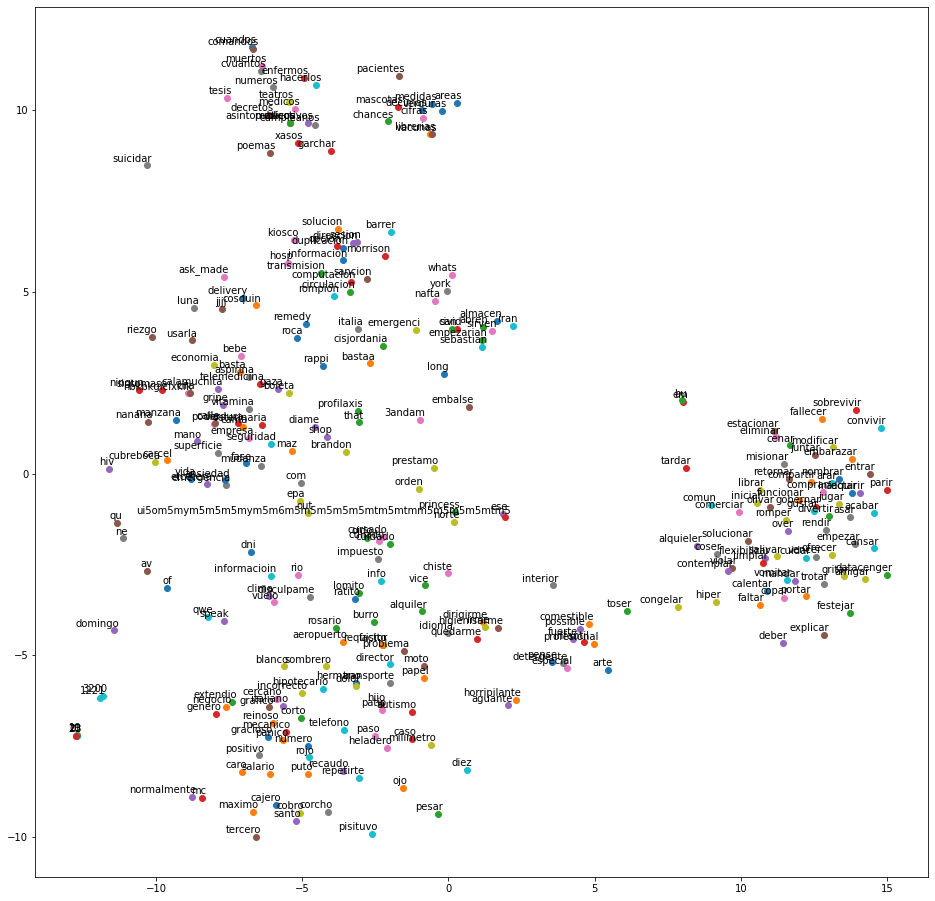

In [ ]:
spacy_plot_words(lematizadas)